In [216]:
#importing library


#data manipulation library
import numpy as np
import pandas as pd

#data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#data processing library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#machine learning library
import tensorflow as tf

In [217]:
#loading the dataset
df=pd.read_csv('/kaggle/input/earthquake-database/database.csv')
#showing the dataset
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [218]:
df=df.drop('ID',axis=1)

In [219]:
#getting basic information about the function with info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [220]:
#checking for missing value in the dataset
df.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

# Preprocessing the Dataset

In [221]:
#this function will give the percentage of null value with respect to its total value
df.isna().mean()

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809457
Depth Seismic Stations        0.696865
Magnitude                     0.000000
Magnitude Type                0.000128
Magnitude Error               0.986033
Magnitude Seismic Stations    0.890484
Azimuthal Gap                 0.688237
Horizontal Distance           0.931488
Horizontal Error              0.950624
Root Mean Square              0.258842
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
dtype: float64

In [222]:
number_of_rows=df.shape[0]

In [223]:
number_of_rows

23412

In [224]:
columns_to_drop=df.loc[:,df.isna().sum()>0.66*number_of_rows].columns

In [225]:
df=df.drop(columns_to_drop,axis=1)

In [226]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.1898,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.2187,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.5200,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.4300,US,US,US,Reviewed


In [227]:
df['Root Mean Square']=df['Root Mean Square'].fillna(df['Root Mean Square'].mean())

In [228]:
#again checking the missing values
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [229]:
#replacing the missing value with mode of that column
df['Magnitude Type']=df['Magnitude Type'].fillna(df['Magnitude Type'].mode()[0])

In [230]:
#checking the missing value
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      0
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [231]:
df['Magnitude Type'].mode()[0]

'MW'

In [232]:
#again checking the dataset
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed


In [233]:
#Extracting month from the date column
df['Month']=df['Date'].apply(lambda x:x[0:2])

In [234]:
#Extracting year part from the data column
df['Year']=df['Date'].apply(lambda x:x[-4:])

In [235]:
#dropping the original date column
df=df.drop('Date',axis=1)

In [236]:
#Extracting hour from the time column
df['Hour']=df['Time'].apply(lambda x:x[0:2])

In [237]:

#Extracting minute part from the time column
df['Minute']=df['Time'].apply(lambda x:x[3:5])

In [238]:
#Extracting second part from the time columns
df['Second']=df['Time'].apply(lambda x:x[-2:])

In [239]:
#Dropping the original time column
df=df.drop('Time',axis=1)


In [240]:
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour,Minute,Second
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,13,44,18
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,11,29,49
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,18,05,58
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,18,49,43
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,13,32,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016,08,22,12
23408,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016,09,13,47
23409,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016,12,38,51
23410,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016,22,30,19


In [241]:
contains_z=df[df['Year'].str.contains('Z')].index

In [242]:
df=df.drop(contains_z,axis=0).reset_index(drop=True)

In [243]:
df['Year']=df['Year'].astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [244]:
df['Month']=df['Month'].astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [245]:
df['Second']=df['Second'].astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [246]:
df['Hour']=df['Hour'].astype(np.int)
df['Minute']=df['Minute'].astype(np.int)
df['Second']=df['Second'].astype(np.int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23409 non-null  float64
 1   Longitude         23409 non-null  float64
 2   Type              23409 non-null  object 
 3   Depth             23409 non-null  float64
 4   Magnitude         23409 non-null  float64
 5   Magnitude Type    23409 non-null  object 
 6   Root Mean Square  23409 non-null  float64
 7   Source            23409 non-null  object 
 8   Location Source   23409 non-null  object 
 9   Magnitude Source  23409 non-null  object 
 10  Status            23409 non-null  object 
 11  Month             23409 non-null  int64  
 12  Year              23409 non-null  int64  
 13  Hour              23409 non-null  int64  
 14  Minute            23409 non-null  int64  
 15  Second            23409 non-null  int64  
dtypes: float64(5), int64(5), object(6)
memor

In [248]:
numerical_columns=[column for column in df.columns if df.dtypes[column]!='object']

In [249]:
corr=df[numerical_columns].corr()

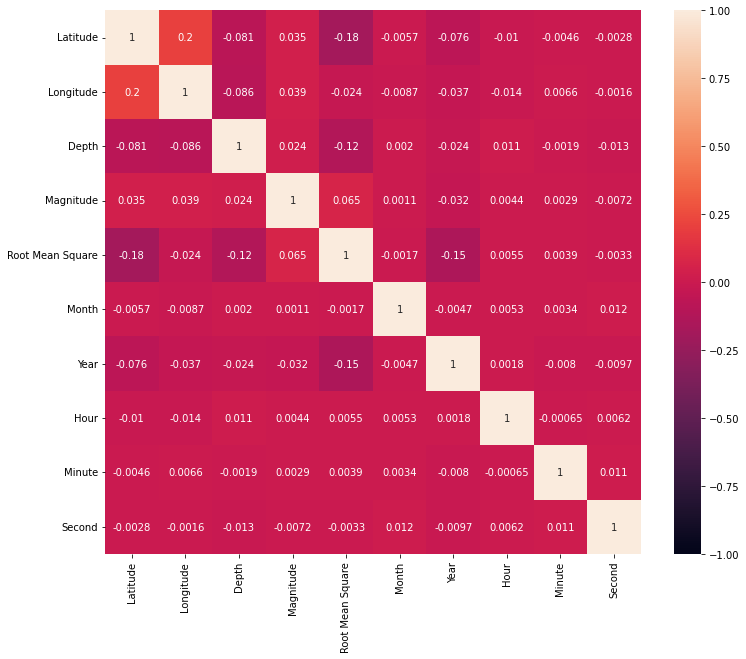

In [250]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1)
plt.show()

In [251]:
pd.get_dummies(df['Type'])

,Earthquake,Explosion,Nuclear Explosion,Rock Burst
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
23404,1,0,0,0
23405,1,0,0,0
23406,1,0,0,0
23407,1,0,0,0


In [252]:
#creating dummies column
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [253]:
df=onehot_encode(df,['Type','Magnitude Type','Source','Location Source','Magnitude Source'],['ty','mg','so','lo','ms'])

In [254]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,Minute,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,Automatic,1,1965,13,44,...,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,Automatic,1,1965,11,29,...,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,Automatic,1,1965,18,5,...,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,Automatic,1,1965,18,49,...,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,Automatic,1,1965,13,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,38.3917,-118.8941,12.30,5.6,0.189800,Reviewed,12,2016,8,22,...,1,0,0,0,0,0,0,0,0,0
23405,38.3777,-118.8957,8.80,5.5,0.218700,Reviewed,12,2016,9,13,...,1,0,0,0,0,0,0,0,0,0
23406,36.9179,140.4262,10.00,5.9,1.520000,Reviewed,12,2016,12,38,...,0,0,0,0,0,0,1,0,0,0
23407,-9.0283,118.6639,79.00,6.3,1.430000,Reviewed,12,2016,22,30,...,0,0,0,0,0,0,1,0,0,0


In [255]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,Minute,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,Automatic,1,1965,13,44,...,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,Automatic,1,1965,11,29,...,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,Automatic,1,1965,18,5,...,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,Automatic,1,1965,18,49,...,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,Automatic,1,1965,13,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,38.3917,-118.8941,12.30,5.6,0.189800,Reviewed,12,2016,8,22,...,1,0,0,0,0,0,0,0,0,0
23405,38.3777,-118.8957,8.80,5.5,0.218700,Reviewed,12,2016,9,13,...,1,0,0,0,0,0,0,0,0,0
23406,36.9179,140.4262,10.00,5.9,1.520000,Reviewed,12,2016,12,38,...,0,0,0,0,0,0,1,0,0,0
23407,-9.0283,118.6639,79.00,6.3,1.430000,Reviewed,12,2016,22,30,...,0,0,0,0,0,0,1,0,0,0


In [256]:
df['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [257]:
df['Status']=df['Status'].apply(lambda x:1 if x=='Automatic' else 0)

In [258]:
df['Status'].unique()

array([1, 0])

In [259]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,Minute,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,1,1,1965,13,44,...,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,1,1,1965,11,29,...,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,1,1,1965,18,5,...,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,1,1,1965,18,49,...,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,1,1,1965,13,32,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,38.3917,-118.8941,12.30,5.6,0.189800,0,12,2016,8,22,...,1,0,0,0,0,0,0,0,0,0
23405,38.3777,-118.8957,8.80,5.5,0.218700,0,12,2016,9,13,...,1,0,0,0,0,0,0,0,0,0
23406,36.9179,140.4262,10.00,5.9,1.520000,0,12,2016,12,38,...,0,0,0,0,0,0,1,0,0,0
23407,-9.0283,118.6639,79.00,6.3,1.430000,0,12,2016,22,30,...,0,0,0,0,0,0,1,0,0,0


In [260]:
y=df['Status']
x=df.drop('Status',axis=1)

In [261]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)

In [262]:
x

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month,Year,Hour,Minute,Second,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,0.583382,0.844374,0.496329,0.277590,0.000083,-1.603251,-1.915523,0.225081,0.845388,-0.663851,...,-0.013073,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,-0.898535,-0.011321,-0.006536,-0.016012
1,0.006118,0.698859,0.075459,-0.195139,0.000083,-1.603251,-1.915523,-0.065162,-0.016437,1.116504,...,-0.013073,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,-0.898535,-0.011321,-0.006536,-0.016012
2,-0.739148,-1.701896,-0.413925,0.750319,0.000083,-1.603251,-1.915523,0.950689,-1.395357,1.633382,...,-0.013073,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,-0.898535,-0.011321,-0.006536,-0.016012
3,-2.017577,-0.503487,-0.454707,-0.195139,0.000083,-1.603251,-1.915523,0.950689,1.132663,0.771920,...,-0.013073,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,-0.898535,-0.011321,-0.006536,-0.016012
4,0.340694,0.691489,-0.454707,-0.195139,0.000083,-1.603251,-1.915523,0.225081,0.155928,1.173935,...,-0.013073,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,-0.898535,-0.011321,-0.006536,-0.016012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,1.219183,-1.263071,-0.476729,-0.667868,-5.131807,1.581053,1.619841,-0.500526,-0.418622,-1.008436,...,76.493464,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,-0.898535,-0.011321,-0.006536,-0.016012
23405,1.218718,-1.263084,-0.505277,-0.904232,-4.953759,1.581053,1.619841,-0.355405,-0.935717,1.001643,...,76.493464,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,-0.898535,-0.011321,-0.006536,-0.016012
23406,1.170240,0.803025,-0.495489,0.041226,3.063356,1.581053,1.619841,0.079960,0.500658,1.231366,...,-0.013073,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,1.112922,-0.011321,-0.006536,-0.016012
23407,-0.355566,0.629637,0.067302,0.986684,2.508880,1.581053,1.619841,1.531175,0.041018,-0.606420,...,-0.013073,-0.01849,-0.019612,-0.009244,-0.006536,-0.006536,1.112922,-0.011321,-0.006536,-0.016012


In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)

In [266]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18727, 109)
(4682, 109)
(18727,)
(4682,)


In [263]:
x.shape

(23409, 109)

In [269]:
inputs=tf.keras.Input(shape=(109,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x
                                                    )

In [272]:
model=tf.keras.Model(inputs,outputs)
model.compile(optimizer='adam',loss='binary_crossentropy'
              ,metrics=[tf.keras.metrics.AUC(
        name='auc')])


In [275]:
batch_size=32
epochs=30
history=model.fit(x_train,y_train,validation_split=0.2,
                batch_size=batch_size,epochs=epochs,callbacks=[tf.keras.callbacks.
                                                              ReduceLROnPlateau()],
                verbose=0)

2022-12-26 07:29:56.309495: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [276]:
model.evaluate(x_test,y_test)

147/147 [==============================] - 0s 2ms/step - loss: 3.1221e-06 - auc: 1.0000


[3.1221063636621693e-06, 1.0]